# Mid Term Project

## by Clemens Freytag, Simon Herz & Leon Prucker

This project aims to analyze the cycling infrastructure of Graz and Salzburg and to conduct a comparison between the two cities. The following questions will be addressed:

(1) Total length of bike routes in Graz and Salzburg

(2) Relative proportion of bike route length compared to the total road network

(3) Bike route density per square kilometer

(4) Relative proportion of bike route length compared to the total road network per district

(5) Evaluation of the "bike-friendliness" by examining the proximity of green spaces, supermarkets and public transport stops

### Libaries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

### Loading the data for the city boundaries, cycle paths, roads, the greenspaces, supermarkets and bus/tram stops

In [2]:
districts_austria = gpd.read_file("gadm41_AUT_4.shp")
districts_austria = districts_austria.to_crs(epsg=32633)

bikeroutes = gpd.read_file("bikeroutes.shp")
bikeroutes = bikeroutes.to_crs(epsg=32633)

roads = gpd.read_file("Straßen.shp")
roads = roads.to_crs(epsg=32633)

green_graz = gpd.read_file("green_graz.geojson")
green_graz = green_graz.to_crs(epsg=32633)

green_salz = gpd.read_file("green_salz.geojson")
green_salz = green_salz.to_crs(epsg=32633)

super_graz = gpd.read_file("super_graz.geojson")
super_graz = super_graz.to_crs(epsg=32633)

super_salz = gpd.read_file("super_salz.geojson")
super_salz = super_salz.to_crs(epsg=32633)

transport_graz = gpd.read_file("transport_graz.geojson")
transport_graz = transport_graz.to_crs(epsg=32633)

transport_salz = gpd.read_file("transport_salz.geojson")
transport_salz = transport_salz.to_crs(epsg=32633)

### Filtering city limits for Graz and Salzburg

In [3]:
graz_districts = districts_austria[districts_austria["NAME_3"] == "Graz"]
salzburg_districts = districts_austria[districts_austria["NAME_3"] == "Salzburg"]

### Intersecting cycle paths and roads with the city limits

In [4]:
graz_bikeroutes = gpd.overlay(bikeroutes, graz_districts, how='intersection')
graz_roads = gpd.overlay(roads, graz_districts, how='intersection')

salzburg_bikeroutes = gpd.overlay(bikeroutes, salzburg_districts, how='intersection')
salzburg_roads = gpd.overlay(roads, salzburg_districts, how='intersection')

Text(0.5, 1.0, 'Graz')

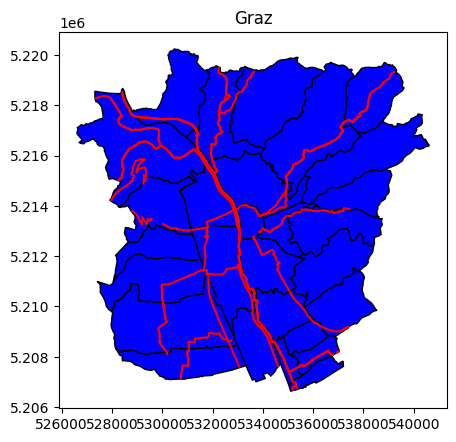

In [5]:
fig, ax = plt.subplots(figsize =(5,5))
graz_districts.plot(ax = ax, color = 'blue', edgecolor = 'black')
graz_bikeroutes.plot(ax = ax, color = 'red')
plt.title('Graz')

Text(0.5, 1.0, 'Salzburg')

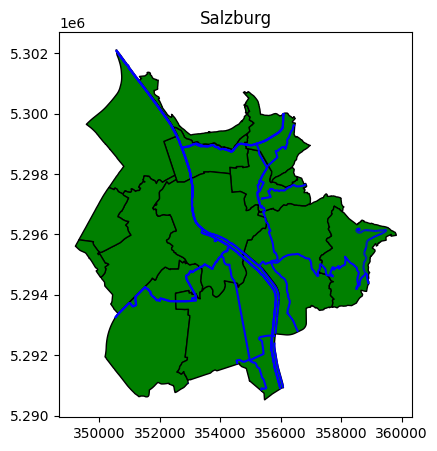

In [6]:
fig, ax = plt.subplots(figsize =(5,5))
salzburg_districts.plot(ax = ax, color = 'green', edgecolor = 'black')
salzburg_bikeroutes.plot(ax = ax, color = 'blue')
plt.title('Salzburg')

### (1) Total length of bike routes in Graz and Salzburg

In [7]:
# Calculating total lengths
graz_bikeroutes['length'] = graz_bikeroutes.geometry.length
graz_roads['length'] = graz_roads.geometry.length
salzburg_bikeroutes['length'] = salzburg_bikeroutes.geometry.length
salzburg_roads['length'] = salzburg_roads.geometry.length

graz_bikeroutes_length = graz_bikeroutes['length'].sum()
graz_roads_length = graz_roads['length'].sum()

salzburg_bikeroutes_length = salzburg_bikeroutes['length'].sum()
salzburg_roads_length = salzburg_roads['length'].sum()

# Output of the result in km with two decimal places 
print(f"Total length of bikeroutes in Graz: {graz_bikeroutes_length/1000:.2f} km")
print(f"Total length of bikeroutes in Salzburg: {salzburg_bikeroutes_length.sum()/1000:.2f} km")

Total length of bikeroutes in Graz: 153.19 km
Total length of bikeroutes in Salzburg: 122.98 km


### (2) Relative proportion of bike route length compared to the total road network

In [12]:
graz_bike_percentage = (graz_bikeroutes_length / graz_roads_length) * 100
salzburg_bike_percentage = (salzburg_bikeroutes_length / salzburg_roads_length) * 100

print(f"Relative share of cycle paths in Graz: {graz_bike_percentage:.2f} %")
print(f"Relative share of cycle paths in Salzburg: {salzburg_bike_percentage:.2f} %")

Relative share of cycle paths in Graz: 5.45 %
Relative share of cycle paths in Salzburg: 10.00 %


### (3) Bike route density per square kilometer

In [8]:
# Graz
graz_area = sum(graz_districts.geometry.area)  # Fläche in Quadratmetern
graz_area_km2 = graz_area / 1000000  # Fläche in Quadratkilometern
bike_density_graz = graz_bikeroutes_length / graz_area_km2

print(f"The bike route density in Graz is {bike_density_graz/1000:.2f} km per square kilometer.")

# Salzburg
salzburg_area = sum(salzburg_districts.geometry.area)  # Fläche in Quadratmetern
salzburg_area_km2 = salzburg_area / 1000000  # Fläche in Quadratkilometern
bike_density_salzburg = salzburg_bikeroutes_length / salzburg_area_km2

print(f"The bike route density in Salzburg is {bike_density_salzburg/1000:.2f} km per square kilometer.")

The bike route density in Graz is 1.20 km per square kilometer.
The bike route density in Salzburg is 1.87 km per square kilometer.


### (4) Relative proportion of bike route length compared to the total road network per district

In [25]:
# Group by district (NAME_4) and calculate total lengths
graz_bikeroutes_by_district = graz_bikeroutes.groupby('NAME_4')['length'].sum().reset_index()
graz_roads_by_district = graz_roads.groupby('NAME_4')['length'].sum().reset_index()

salzburg_bikeroutes_by_district = salzburg_bikeroutes.groupby('NAME_4')['length'].sum().reset_index()
salzburg_roads_by_district = salzburg_roads.groupby('NAME_4')['length'].sum().reset_index()

# Merge bike route and road lengths at the district level using outer join
graz_data = graz_roads_by_district.merge(
    graz_bikeroutes_by_district, on='NAME_4', how='left', suffixes=('_road', '_bike')
)
salzburg_data = salzburg_roads_by_district.merge(
    salzburg_bikeroutes_by_district, on='NAME_4', how='left', suffixes=('_road', '_bike')
)

# Replace NaN values (no bike routes in a district) with 0
graz_data['length_bike'] = graz_data['length_bike'].fillna(0)
salzburg_data['length_bike'] = salzburg_data['length_bike'].fillna(0)

# Calculate the relative share of bike route length compared to the total road length per district
graz_data['bike_percentage'] = (graz_data['length_bike'] / graz_data['length_road']) * 100
salzburg_data['bike_percentage'] = (salzburg_data['length_bike'] / salzburg_data['length_road']) * 100

# Output results
print("Relative share of bike routes compared to total road length in Graz per district:")
for index, row in graz_data[['NAME_4', 'bike_percentage']].sort_values(by='bike_percentage', ascending=False).iterrows():
    print(f"{row['NAME_4']}: {row['bike_percentage']:.2f}%")

print("\nRelative share of bike routes compared to total road length in Salzburg per district:")
for index, row in salzburg_data[['NAME_4', 'bike_percentage']].sort_values(by='bike_percentage', ascending=False).iterrows():
    print(f"{row['NAME_4']}: {row['bike_percentage']:.2f}%")

# Identify the districts with the highest bike route share
best_graz_district = graz_data.loc[graz_data['bike_percentage'].idxmax()]
best_salzburg_district = salzburg_data.loc[salzburg_data['bike_percentage'].idxmax()]

print("\nDistrict in Graz with the highest bike route share:")
print(f"{best_graz_district['NAME_4']}: {best_graz_district['bike_percentage']:.2f}%")

print("\nDistrict in Salzburg with the highest bike route share:")
print(f"{best_salzburg_district['NAME_4']}: {best_salzburg_district['bike_percentage']:.2f}%")


Relative share of bike routes compared to total road length in Graz per district:
Murfeld: 19.41%
Gösting: 17.25%
Lend: 14.64%
Graz Stadt-St. Veit ob Graz: 14.45%
Neudorf: 12.87%
Graz Stadt-Fölling: 10.07%
Gries: 7.88%
Andritz: 7.86%
Rudersdorf: 7.44%
Wenisbuch: 5.45%
Jakomini: 5.09%
Innere Stadt: 4.96%
Graz Stadt-Thondorf: 4.95%
Algersdorf: 4.10%
Liebenau: 3.94%
Geidorf: 3.46%
Sankt Leonhard: 3.28%
Webling: 3.24%
Sanktaßgang: 2.46%
Wetzelsdorf: 2.16%
Graz Stadt-Messendorf: 2.07%
Waltendorf: 1.93%
Engelsdorf: 1.29%
Graz Stadt-Weinitzen: 1.22%
Ragnitz: 0.47%
Baierdorf: 0.00%
Sanktfting: 0.00%
Sankt Peter: 0.00%

Relative share of bike routes compared to total road length in Salzburg per district:
Gaisberg I: 27.76%
Hallwang II: 21.10%
Itzling: 18.91%
Morzg: 17.92%
Liefering II: 10.55%
Leopoldskron: 9.70%
Salzburg: 9.48%
Gnigl: 8.07%
Aigen I: 5.47%
Bergheim II: 0.00%
Heuberg II: 0.00%
Maxglan: 0.00%
Siezenheim II: 0.00%
Wals II: 0.00%

District in Graz with the highest bike route share:


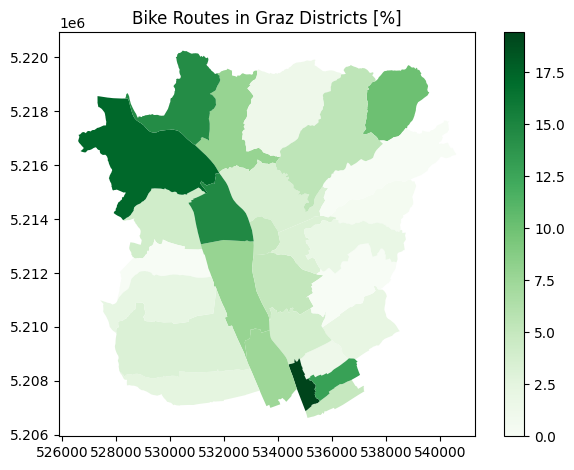

In [41]:
# Merge Graz-Daten
graz_map = graz_districts.merge(graz_data, on='NAME_4')

# Merge Salzburg-Data
salzburg_map = salzburg_districts.merge(salzburg_data, on='NAME_4')

# Graz Map
graz_map.plot(
    column='bike_percentage', 
    cmap='Greens',             
    legend=True,
    
)
plt.title("Bike Routes in Graz Districts [%]")

plt.tight_layout()
plt.show()

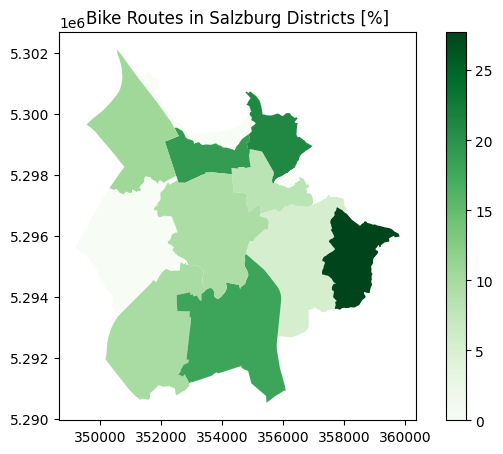

In [42]:
# Salzburg Map
salzburg_map.plot(
    column='bike_percentage',  
    cmap='Greens',             
    legend=True,
    
)
plt.title("Bike Routes in Salzburg Districts [%]")

plt.tight_layout()
plt.show()

### (5) Evaluation of the "bike-friendliness" by examining the proximity of green spaces, supermarkets and public transport stops

In [39]:
super_count_graz = len(super_graz)

transport_count_graz = len(transport_graz)

green_buffer_graz = green_graz.buffer(50, cap_style=3)

bike_green_graz = gpd.clip(graz_bikeroutes, green_buffer_graz)

bike_green_length_graz = bike_green_graz.length.sum()
print(f"Length of bike routes near green spaces in Graz: {bike_green_length_graz / 1000:.2f} km")

bike_length_graz = graz_bikeroutes['length'].sum()
bike_green_percentage_graz = (bike_green_length_graz / bike_length_graz) * 100
print(f"Percentage of bike routes near green spaces in Graz: {bike_green_percentage_graz:.2f}%")

super_buffer_graz = super_graz.buffer(50, cap_style=3)

super_buffer_gdf_graz = gpd.GeoDataFrame(geometry=super_buffer_graz, crs=super_graz.crs)

bike_super_graz = gpd.overlay(graz_bikeroutes, super_buffer_gdf_graz, how='intersection')

super_bike_count_graz = len(bike_super_graz)
print(f"Number of supermarkets near bike routes in Graz: {super_bike_count_graz}")

super_bike_percentage_graz = (super_bike_count_graz / len(super_graz)) * 100
print(f"Percentage of supermarkets near bike routes in Graz: {super_bike_percentage_graz:.2f}%")

transport_buffer_graz = transport_graz.buffer(50, cap_style=3)

transport_buffer_gdf_graz = gpd.GeoDataFrame(geometry=transport_buffer_graz, crs=transport_graz.crs)

bike_transport_graz = gpd.overlay(graz_bikeroutes, transport_buffer_gdf_graz, how='intersection')

transport_bike_count_graz = len(bike_transport_graz)
print(f"Number of public transports stops near bike routes in Graz: {transport_bike_count_graz}")

transport_count_graz = len(transport_graz)

transport_bike_percentage_graz = (transport_bike_count_graz / transport_count_graz) * 100
print(f"Percentage of public transport stops near bike routes in Graz: {transport_bike_percentage_graz:.2f}%")

Length of bike routes near green spaces in Graz: 81.79 km
Percentage of bike routes near green spaces in Graz: 53.39%
Number of supermarkets near bike routes in Graz: 45
Percentage of supermarkets near bike routes in Graz: 27.44%
Number of public transports stops near bike routes in Graz: 950
Percentage of public transport stops near bike routes in Graz: 37.58%


/tmp/ipykernel_409/3263512056.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="lower left")


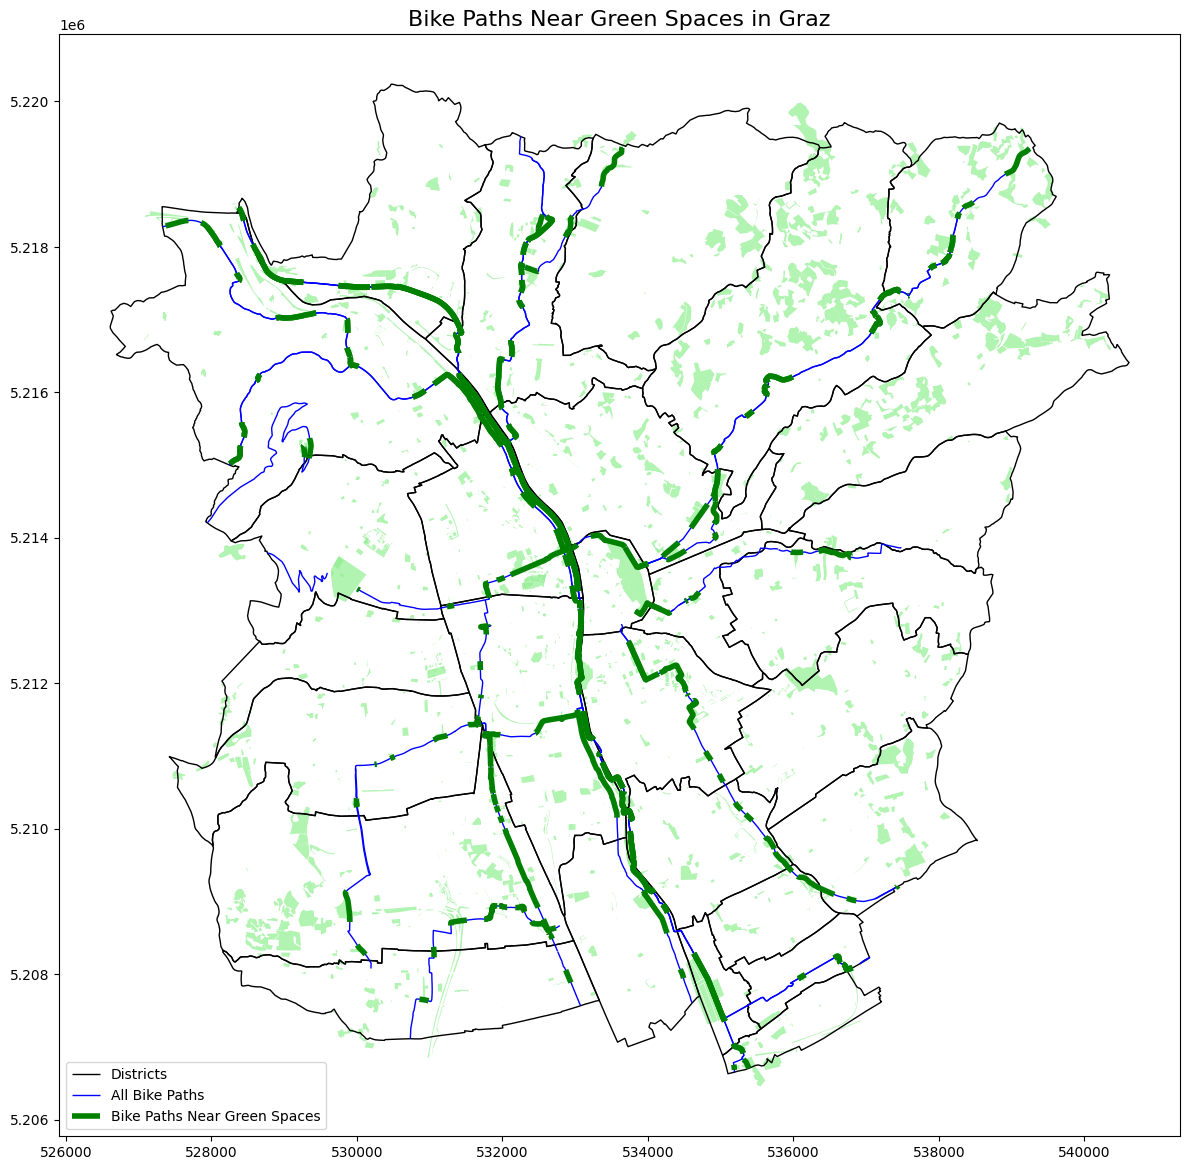

In [60]:
fig, ax = plt.subplots(figsize=(12, 12))

graz_map.boundary.plot(ax=ax, edgecolor='black', linewidth=1, label="Districts")

green_graz.plot(ax=ax, color='lightgreen', alpha=0.7, label="Green Spaces")

graz_bikeroutes.plot(ax=ax, color='blue', linewidth=1, label="All Bike Paths")

bike_green_graz.plot(ax=ax, color='green', linewidth=4, label="Bike Paths Near Green Spaces")

ax.set_title("Bike Paths Near Green Spaces in Graz", fontsize=16)
ax.legend(loc="lower left")

plt.tight_layout()
plt.show()

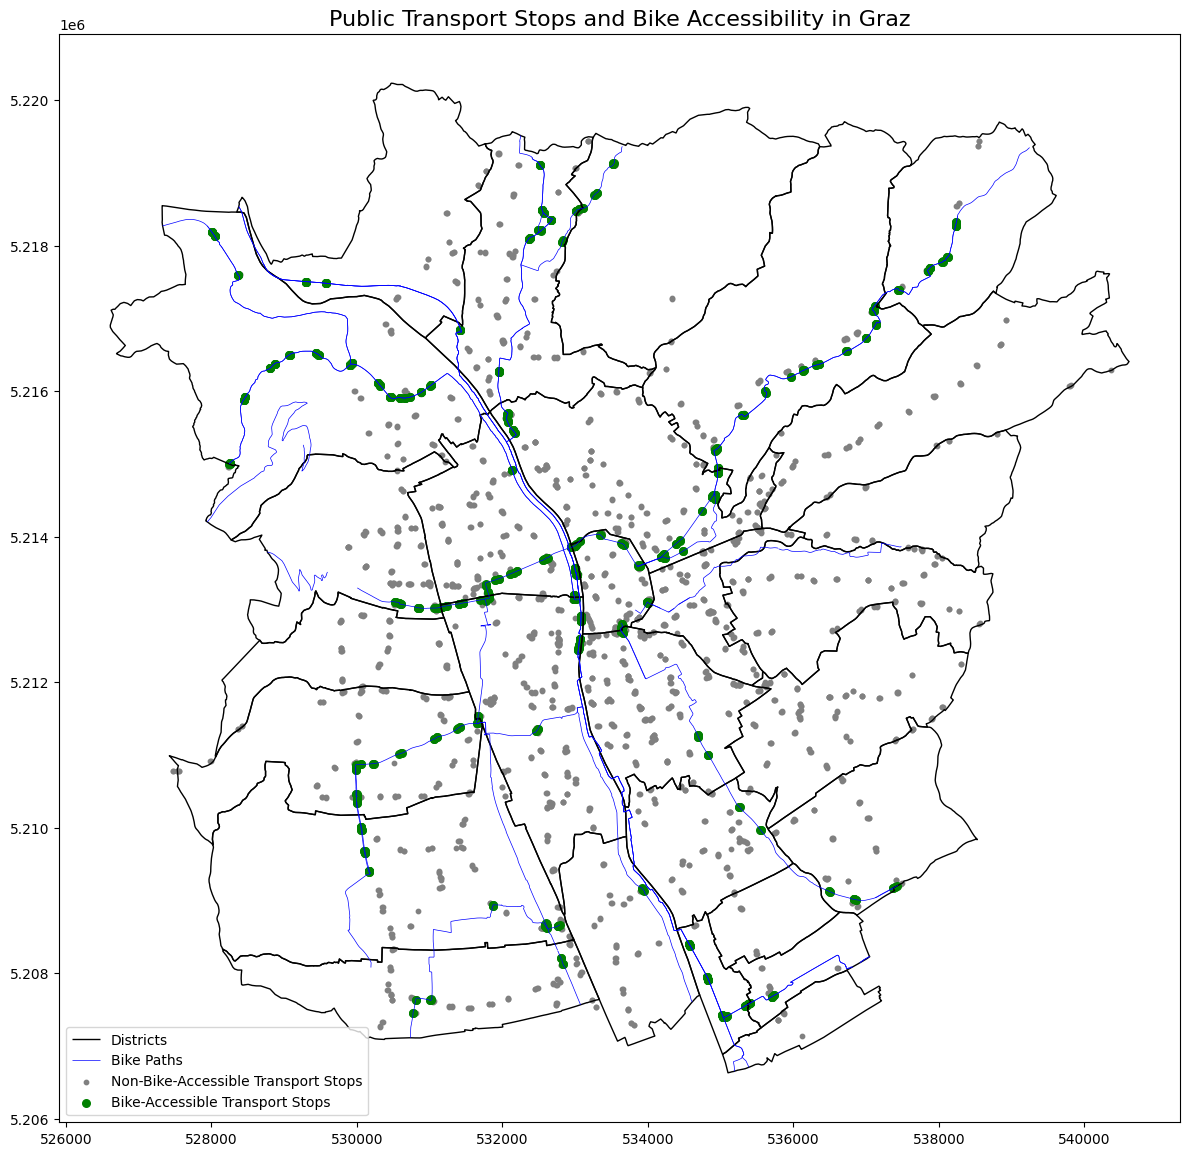

In [56]:
bike_accessible_points = bike_transport_graz.copy()
bike_accessible_points['geometry'] = bike_accessible_points.geometry.centroid

non_bike_accessible_stops = transport_graz[~transport_graz.geometry.isin(bike_transport_graz.geometry)]

fig, ax = plt.subplots(figsize=(12, 12))

graz_map.boundary.plot(ax=ax, edgecolor='black', linewidth=1, label="Districts")

graz_bikeroutes.plot(ax=ax, color='blue', linewidth=0.5, label="Bike Paths")

non_bike_accessible_stops.plot(
    ax=ax, color='grey', markersize=10, label="Non-Bike-Accessible Transport Stops"
)
bike_accessible_points.plot(
    ax=ax, color='green', markersize=30, label="Bike-Accessible Transport Stops"
)

ax.set_title("Public Transport Stops and Bike Accessibility in Graz", fontsize=16)
ax.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [40]:
super_count_salz = len(super_salz)

transport_count_salz = len(transport_salz)

green_buffer_salz = green_salz.buffer(50, cap_style=3)

bike_green_salz = gpd.clip(salzburg_bikeroutes, green_buffer_salz)

bike_green_length_salz = bike_green_salz.length.sum()
print(f"Length of bike routes near green spaces in Salzburg: {bike_green_length_salz / 1000:.2f} km")

bike_length_salz = salzburg_bikeroutes['length'].sum()
bike_green_percentage_salz = (bike_green_length_salz / bike_length_salz) * 100
print(f"Percentage of bike routes near green spaces in Salzburg: {bike_green_percentage_salz:.2f}%")

super_buffer_salz = super_salz.buffer(50, cap_style=3)

super_buffer_gdf_salz = gpd.GeoDataFrame(geometry=super_buffer_salz, crs=super_salz.crs)

bike_super_salz = gpd.overlay(salzburg_bikeroutes, super_buffer_gdf_salz, how='intersection')

super_bike_count_salz = len(bike_super_salz)
print(f"Number of supermarkets near bike routes in Salzburg: {super_bike_count_salz}")

super_bike_percentage_salz = (super_bike_count_salz / len(super_salz)) * 100
print(f"Percentage of supermarkets near bike routes in Salzburg: {super_bike_percentage_salz:.2f}%")

transport_buffer_salz = transport_salz.buffer(50, cap_style=3)

transport_buffer_gdf_salz = gpd.GeoDataFrame(geometry=transport_buffer_salz, crs=transport_salz.crs)

bike_transport_salz = gpd.overlay(salzburg_bikeroutes, transport_buffer_gdf_salz, how='intersection')

transport_bike_count_salz = len(bike_transport_salz)
print(f"Number of public transport stops near bike routes in Salzburg: {transport_bike_count_salz}")

transport_count_salz = len(transport_salz)

transport_bike_percentage_salz = (transport_bike_count_salz / transport_count_salz) * 100
print(f"Percentage of public transport stops near bike routes in Salzburg: {transport_bike_percentage_salz:.2f}%")

Length of bike routes near green spaces in Salzburg: 61.97 km
Percentage of bike routes near green spaces in Salzburg: 50.39%
Number of supermarkets near bike routes in Salzburg: 11
Percentage of supermarkets near bike routes in Salzburg: 11.22%
Number of public transport stops near bike routes in Salzburg: 207
Percentage of public transport stops near bike routes in Salzburg: 35.94%
